In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/Jupyter_Data_Visualization/master/kanjanaphisek_bangkok_pm25.csv')
df.head()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0


In [3]:
df.rename(columns = {'UTC Hour':'Hour'},inplace = True)
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) # UTC to Bangkok time
df.drop(columns=['PM10_mask','Retrospective'],inplace=True)
df.head()

,Year,Month,Day,Hour,PM2.5,datetime
0,2016,3,3,8,62.9,2016-03-03 15:00:00
1,2016,3,3,9,62.9,2016-03-03 16:00:00
2,2016,3,3,10,55.5,2016-03-03 17:00:00
3,2016,3,3,11,55.5,2016-03-03 18:00:00
4,2016,3,3,12,47.9,2016-03-03 19:00:00


In [4]:
arr = []
for i in df['PM2.5']:
    if i<50:
        arr.append('Normal')
    elif i<100:
        arr.append('High')
    else:
        arr.append('Very high')
df['size'] = arr
df.head()

,Year,Month,Day,Hour,PM2.5,datetime,size
0,2016,3,3,8,62.9,2016-03-03 15:00:00,High
1,2016,3,3,9,62.9,2016-03-03 16:00:00,High
2,2016,3,3,10,55.5,2016-03-03 17:00:00,High
3,2016,3,3,11,55.5,2016-03-03 18:00:00,High
4,2016,3,3,12,47.9,2016-03-03 19:00:00,Normal


In [45]:
pie_size = df.groupby(by=df['size']).sum()
pie_size

,Year,Month,Day,Hour,PM2.5
size,,,,,
High,3502512,8927,27479,21150,109826.2
Normal,44343557,149267,345301,251326,500882.0
Very high,189780,98,2036,882,10790.0


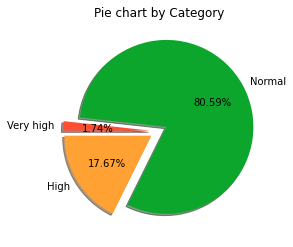

In [56]:
explode = (0.1, 0.1, 0.1)
label = ['High','Normal','Very high']
color = ['#FFA233','#0CA62C','#FF4F33']
fig, ax = plt.subplots()
ax.pie(pie_size['PM2.5'],
       explode=explode,
       labels = label,
       colors = color,
       autopct='%1.2f%%',
       shadow=True,
       startangle=180)
ax.set_title('Pie chart by Category')
plt.show()

In [47]:
pie_year = df.groupby(by=df['Year']).sum()
pie_year

,Month,Day,Hour,PM2.5
Year,,,,
2016,51713,110640,79592,168650.1
2017,52268,125971,90355,198026.9
2018,53261,125734,93163,203534.2
2019,1050,12471,10248,51287.0


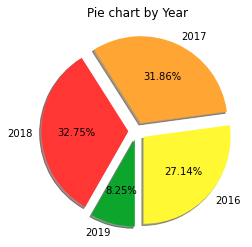

In [59]:
explode = (0.1, 0.1, 0.1,0.1)
label = [2016,2017,2018,2019]
colors = ['#FFF833','#FFA533','#FF3633','#0CA62C']
fig, ax = plt.subplots()
ax.pie(pie_year['PM2.5'],
       explode=explode,
       labels = label,
       colors = colors,
       autopct='%1.2f%%',
       shadow=True,
       startangle=270)
ax.set_title('Pie chart by Year')
plt.show()